<div class="text_center", style="font-family: 'Times New Roman', Times, serif;
                                 text-align: center;
                                 font-weight: normal;
                                 font-size: 18px;
                                 padding: 0px 100px 0px 0px;">
    <span style="font-size: 15px; font-style: italic;">
        Partial Differential Equations with Applications in Physics and Industry
    </span>
    <hr>
    <br>
    <br> 
    <span style="font-size: 41px;"> Wave equation for vibrating membrane </span>
    <br>
    <br>
    <br>
    Marcin Kostrzewa, &nbsp;Marcin Miśkiewicz
</div>

<div class="text", style="font-family: 'Times New Roman', Times, serif;
                          font-weight: normal;
                          text-align: justify;
                          font-size: 18px;
                          padding: 0px 100px 0px 0px;">
    <h2>Abstract</h2>
    <hr>
    The aim of our project is to analyse solving numerically the equation modelling motion of the vibrating rectangular membrane. 
    
First, we will focus on the equation describing such motion and present its analytical solution. Then, we will use the finite difference method to solve and present the solutions. Lastly, we will talk about the stability, convergence and consistency of the numerical scheme that we've used.
</div>

<div class="text", style="font-family: 'Times New Roman', Times, serif;
                          font-weight: normal;
                          text-align: justify;
                          font-size: 18px;
                          padding: 0px 100px 0px 0px;">
    
<h2>Rectangular membrane</h2>
<hr>

The motion of rectangular membrane can be described with following equation: 
    
$$\begin{cases}
u_{tt}       = c^2(u_{xx} + u_{yy}),  &(x, y) \in \Omega, \; t \in (0, T],  \tag{$\ast$} \\
u(x, y, 0)   = I(x, y),               &(x, y) \in \Omega, \\
u_t(x, y, 0) = V(x, y),               &(x, y) \in \Omega, \\
u(x, y, t)   = 0,                     &(x, y) \in \partial\Omega, \; t \in (0, T] .
\end{cases}$$
    
where:
* $\Omega \subset \mathbb{R}^d$ is in our case a rectangle $[A, B] \times [C, D]$,
* $\partial \Omega$ is it's boundary,
* $ c $ is a positive constant related to the speed of wave propagation in a given medium.
    
In order to find the solution of ($\ast$) we use the separation of variables method and assume that it is of the following form:
    
$$
u(x, y, t) = X(x)Y(y)T(t). \tag{1}
$$
    
If we plug $(1)$ into $(\ast)$ we would get that:
    
$$
YT\frac{\mathrm{d}^2 X}{\mathrm{d} x^2}  + XT\frac{\mathrm{d}^2 Y}{\mathrm{d}y^2} = \frac{1}{c^2}XY\frac{\mathrm{d}^2T}{\mathrm{d}t^2} \Leftrightarrow \frac{1}{X}\frac{\mathrm{d}^2 X}{\mathrm{d} x^2} + \frac{1}{Y}\frac{\mathrm{d}^2 Y}{\mathrm{d}y^2} = \frac{1}{c^2T}\frac{\mathrm{d}^2T}{\mathrm{d}t^2}. \tag{2}
$$
    
As both sides are complete derivatives of independent variables both sides of the above equality must be equal to some constant. So we can seperate the solutions. For $T$ we get:
    
$$
\frac{1}{c^2T}\frac{\mathrm{d}^2T}{\mathrm{d}t^2} = -\lambda \Leftrightarrow T(t) = K\cos\left(\omega t\right) + L\sin\left(\omega t\right),
$$

where $\omega = c\sqrt{\lambda}$. Going back to the left side of $(2)$ we can write that:
    
$$
\frac{1}{X}\frac{\mathrm{d}^2 X}{\mathrm{d} x^2} + \frac{1}{Y}\frac{\mathrm{d}^2 Y}{\mathrm{d}y^2} = -\lambda\Leftrightarrow \frac{1}{X}\frac{\mathrm{d}^2 X}{\mathrm{d} x^2} = -\frac{1}{Y}\frac{\mathrm{d}^2 Y}{\mathrm{d}y^2} -\lambda = -\mu,
$$
    
because both sides must again be equal to some constant. Assuming that $A = C = 0$ we get from the boundary conditions that $X(0) = X(B) = Y(0) = Y(D) = 0$. Thus, we now should solve following equations:
    
$$
\begin{cases}
X'' + \mu X = 0, &\quad X(0) = X(B) = 0\\
Y'' + \left(\lambda - \mu\right)Y = 0, &\quad Y(0) = Y(B) = 0.
\end{cases}
$$
    
By solving this, we get that:
    
$$
\begin{cases}
X_n(x) = \sin\frac{n\pi x}{B}, \mu_n = \left(\frac{n\pi}{B}\right)^2, \, n = 1, 2, 3\ldots,\\
Y_n(y) = \sin\frac{m\pi y}{D}, \lambda - \mu_m = \left(\frac{m\pi}{D}\right)^2, m= 1, 2, 3, \ldots.
\end{cases}
$$
    
Solving for $\lambda$ we get that:
    
$$
\lambda_{nm} = \left(\frac{n\pi}{B}\right)^2 + \left(\frac{m\pi}{D}\right)^2, \,n, m=1, 2, \ldots 
$$

Combining the results of the seperation of variables method, we obtain a following product solution:
    
$$
u_{nm}(x, y, t) = \left(K\cos\left(\omega_{nm} t\right) + L\sin\left(\omega_{nm} t\right)\right)\sin\frac{n\pi x}{B}\sin\frac{m\pi y}{D},
$$
    
and the general solution is a linear combination of such products:

$$
u\left(x, y, t \right) = \sum_{n=1}^{\infty}\sum_{m=1}^\infty \left(K_{nm}\cos\left(\omega_{nm} t\right) + L_{nm}\sin\left(\omega_{nm} t\right)\right)\sin\frac{n\pi x}{B}\sin\frac{m\pi y}{D}. \tag{3}
$$
    
Functions 

$$
\psi_{nm}(x, y) = \sin\frac{n\pi x}{B}\sin\frac{m \pi y}{D}
$$
    
describe the harmonics of &hellip; General solution is a combination of such modes.
    
Below we will visualize a few of the first modes.
</div>

In [111]:
using Plots, LaTeXStrings

# plotting constants
lighterblue = "#0062ff"
COLORMAP_1 = cgrad([:indigo, :navy, lighterblue, :cyan, :cyan, :aquamarine, :white])
SIZE_1 = (1000, 500);

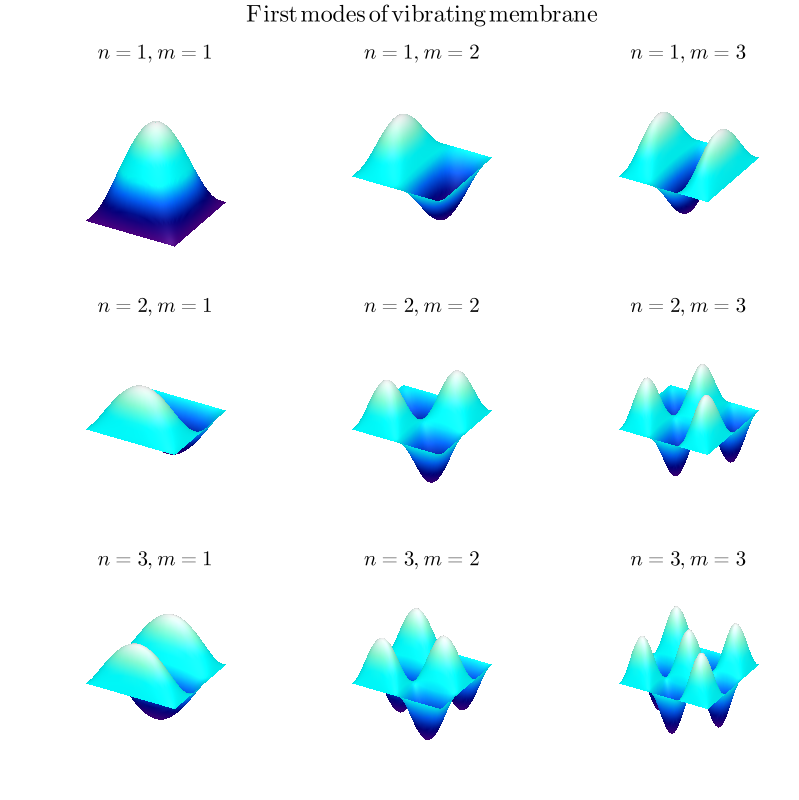

In [136]:
xs = LinRange(0, 1, 50)
ys = xs'
plots = []
for n in 1:3, m in 1:3
    ψ(x, y) = sin(x * π * n) * sin(m * y * π)
    p = surface(xs, xs, ψ.(xs, ys),
                colorbar=false,
                colormap=COLORMAP_1,
                axis=false,
                grid=false,
                title="\$n = $(n), m = $(m)\$")
    push!(plots, p)
end   

plot(plots..., layout=(3, 3), size=(800, 800), plot_title=L"\textrm{First\, modes\, of\, vibrating\, membrane}")

<div class="text", style="font-family: 'Times New Roman', Times, serif;
                          font-weight: normal;
                          text-align: justify;
                          font-size: 18px;
                          padding: 0px 100px 0px 0px;">

Now, let's find the coefficients $K_{nm}$ and $L_{nm}$ using the initial conditions. Setting $t=0$, we obtain:
    
$$
I(x, y) = \sum_{n=1}^{\infty}\sum_{m=1}^\infty K_{nm}\sin\frac{n\pi x}{B}\sin\frac{m\pi y}{D}.
$$
  
We can write initial condition as the single sum:
   
$$
I(x, y) = \sum_{n=1}^\infty K_n(y) \sin\frac{n \pi x}{B},
$$
    
where
    
$$
K_n(y) = \sum_{m=1}^\infty K_{nm}\sin\frac{m\pi y}{D}
$$
    
These series are Fourier series, so we can write the formulas for the coefficients $K_{nm}$ and $K_n$:
    
$$
K_{n}(y) = \frac{2}{B}\int_{0}^{L}I(x, y)\sin\frac{n \pi x}{B}\mathrm{d}x,\\
K_{nm} = \frac{2}{D}\int_0^D K_{n}(y)\sin\frac{m\pi y}{D}\mathrm{d}y.
$$
    
By inserting integral of $K_n$ into the expression for $K_nm$ we get

$$
K_{nm} = \frac{4}{BD}\int_0^B\int_0^DI(x, y)\sin\frac{n\pi x}{B}\sin\frac{m\pi y}{D}\mathrm{d}x\mathrm{d}y.
$$
    
Doing the same using second initial condition:
    
$$
V(x, y) = \sum_{n=1}^\infty\sum_{m=1}^\infty L_{mn}\omega_{mn}\sin\frac{n\pi x}{B}\sin\frac{m\pi y}{D},
$$

we obtain that
    
$$
L_{mn} = 
$$

<div class="text", style="font-family: 'Times New Roman', Times, serif;
                          font-weight: normal;
                          text-align: justify;
                          font-size: 18px;
                          padding: 0px 100px 0px 0px;">
    <h2>Finite difference method</h2>
    <hr>

In order to obtain a numerical soulution of $(\ast)$, we need to discretize the problem. First, let us assume that time points are $t_0 = 0 < t_1 < \ldots < t_{N_T}$ and for all $n = 1, 2\ldots, N$ we have $t_n - t_{n-1} = \Delta t$. For the spatial variables we introduce a rectangular mesh  
    
$$A = x_0 < x_1 < \ldots < x_{N_x} = B, \\ 
C = y_0 < y_1 < \ldots < y_{N_y} = D,$$
    
where $x_i - x_{i-1} = \Delta x$ and $y_j - y_{j-1} = \Delta y$. From this point, we will denote the numerical approximation of $u$ for $(x_i, y_j, t_n)$ as $u_{i,j}^n$.
</div>

<div class="caption", style="font-family: 'Times New Roman', Times, serif;
                              font-weight: normal;
                              text-align: center;
                              font-size: 18px;
                              padding: 0px 100px 20px 0px;">
    
<img src="./media/mesh.png" width="600">
<br>
Figure: rectangular mesh for spatial variables.
    
</div>

<div class="text", style="font-family: 'Times New Roman', Times, serif;
                          font-weight: normal;
                          text-align: justify;
                          font-size: 18px;
                          padding: 0px 100px 0px 0px;">

We can discretize $(\ast)$ using the second order central difference approximation given by
    
    
$$f''(x) \approx \frac{\frac{f(x + h) - f(x)}{h} - \frac{f(x) - f(x-h)}{h}}{h} = \frac{f(x+h) - 2f(x) + f(x-h)}{h^2}.$$
    
Now we obtain    

$$\frac{u_{i,j}^{n+1} - 2u_{i,j}^n + u_{i,j}^{n-1}}{(\Delta t)^2} = c^2\frac{u_{i+1,j}^{n} - 2u_{i,j}^n + u_{i-1,j}^{n}}{(\Delta x)^2} + c^2\frac{u_{i,j+1}^{n} - 2u_{i,j}^n + u_{i,j-1}^{n}}{(\Delta y)^2} \tag{$\dagger$}$$


for $n > 0$, $i >0$, $j > 0$. Letting $r_x = c\frac{\Delta t}{\Delta x}$ and $r_y = c\frac{\Delta t}{\Delta y}$ we can rewrite the above equation as

    
<!-- $$u_{i,j}^{n+1} = u_{i, j}^n\left(2 - 2\left(r_x^2 + r_y^2\right)\right) + r_x^2\left(u_{i+1, j}^n + u_{i-1, j}^n\right) + r_y^2\left(u_{i, j+1}^n + u_{i, j-1}^n\right) - u_{i,j}^{n-1}.$$ -->
    
$$u_{i,j}^{n+1} = 2u_{i, j}^n  - u_{i,j}^{n-1} + r_x^2\left(u_{i+1, j}^n -2u_{i, j}^n + u_{i-1, j}^n\right) + r_y^2\left(u_{i, j+1}^n -2u_{i, j}^n + u_{i, j-1}^n\right). \tag{$\star$}$$
    
<h3>Initial conditions</h3>
    
For the first initial condition, we simply have

$$u^0_{i, j} = I(x_i, y_j).$$
    
Note that for the second initial condition
    
$$V(x_i, y_j) = \frac{u_{i, j}^1 - u_{i, j}^{-1}}{2\Delta t} \; \Longrightarrow \; u_{i,j}^{-1} = u_{i,j}^1 - 2\Delta t V(x_i, y_j)$$

and by combining above equation with $(\star)$ for $n=0$ we can get rid of virtual/ghost values $u_{i, j}^{-1}$, eventually obtaining
    
$$u_{i,j}^{1} = u_{i, j}^0  + \Delta t V_{i, j} + \frac{r_x^2}{2}\left(u_{i+1, j}^0 -2u_{i, j}^0 + u_{i-1, j}^0\right) + \frac{r_y^2}{2}\left(u_{i, j+1}^0 -2u_{i, j}^0 + u_{i, j-1}^0\right).$$
    
Therefore, we should compute $u_{i,j}^0$ and $u_{i, j}^1$ separately, and then use $(\star)$ for $u^n_{i, j}$, $n = 2, 3,\ldots, N_t.$ 
    
<h3>Boundary conditions</h3>

For the boundary conditions we have
    
$$\begin{cases}
u_{0,j}^n\phantom{_x} = u(A, y_j, n) = 0, \\
u_{i,0}^n\phantom{_x} = u(x_i, C, n) = 0, \\
u_{N_x,j}^n = u(B, y_j, n) = 0, \\
u_{i,N_y}^n = u(x_i, D, n) = 0. 
\end{cases} \qquad \text{for } \; n = 0, 1 \ldots, N.$$

</div>

<div class="text", style="font-family: 'Times New Roman', Times, serif;
                          font-weight: normal;
                          text-align: justify;
                          font-size: 18px;
                          padding: 0px 100px 0px 0px;">
    <h2>Implementation</h2>
    <hr>
    Here we present an implementation of the considered scheme in the Julia programming language.
<br><br>🔷 First, let us import needed Packages and define several constants for future plots.
</div>

In [140]:


using Measures, LinearAlgebra, Logging, Printf # used Packages

Logging.disable_logging(Logging.Info); # disable ugly messages after generating animations



<div class="text", style="font-family: 'Times New Roman', Times, serif;
                          font-weight: normal;
                          text-align: justify;
                          font-size: 18px;
                          padding: 0px 100px 0px 0px;">
   🔷 We will need separate function generating rectangular mesh, given $\Delta x$, $\Delta y$, $A$, $B$, $C$ and $D$.
</div>

In [141]:


function grid(; Δx::Float64, Δy::Float64, Ω::Dict) 
    A, B, C, D = Ω["A"], Ω["B"], Ω["C"], Ω["D"]
    xs = A:Δx:B
    ys = C:Δy:D
    nx, ny = length(xs), length(ys)
    xx = xs' .* ones(ny)
    yy = ys  .* ones(nx)'
    return (nx, ny, xx, yy)
end;



<div class="text", style="font-family: 'Times New Roman', Times, serif;
                          font-weight: normal;
                          text-align: justify;
                          font-size: 18px;
                          padding: 0px 100px 0px 0px;">
    🔷 Function <code>wave2D_FD</code> solves 2D wave equation using the previously derived numerical scheme.
</div>

In [5]:


function wave2D_FD(; Δx::Float64, 
                     Δy::Float64, 
                     Δt::Float64, 
                     c::Float64, 
                     N::Int64,
                     ICs::Dict, 
                     BCs::Dict, 
                     grid_params::Tuple)

    (nx, ny, xx, yy) = grid_params
    i = collect(2:nx-1)
    j = collect(2:ny-1)
    
    u_Ay, u_By = BCs["u(A, y, t)"], BCs["u(B, y, t)"]
    u_xC, u_xD = BCs["u(x, C, t)"], BCs["u(x, D, t)"]
    I, V = ICs["I(x, y)"], ICs["V(x, y)"]

    rx = c * Δt / Δx
    ry = c * Δt / Δy

    if rx^2 + ry^2 > 1 # checking if method is stable
        (@warn "Stability condition is not met! (rx^2 + ry^2 > 1)")
    end

    u = zeros(ny, nx, N)
    u[:,  :, 1] = I.(xx, yy)                                                        #   <- first IC (t = 0)
    u[i,  j, 2] = (u[i, j, 1] .+ Δt .* V.(xx, yy)[i, j]                             # }
                .+ rx^2/2 * (u[i.+1, j, 1] .- 2 .* u[i, j, 1] .+ u[i.-1, j, 1])     # } <- second IC (t = 1)
                .+ ry^2/2 * (u[i, j.+1, 1] .- 2 .* u[i, j, 1] .+ u[i, j.-1, 1]))    # }

    u[1,  :, 1:2] .= u_Ay  # }
    u[:,  1, 1:2] .= u_xC  # } <- putting BCs
    u[ny, :, 1:2] .= u_By  # }
    u[:, nx, 1:2] .= u_xD  # }

    for t in 3:N # Solving for t = 2, 3, ..., T
        u[i, j, t] = (2 .* u[i, j, t.-1] .- u[i, j, t.-2]
                    .+ rx^2 * (u[i.+1, j, t.-1] .- 2 .* u[i, j, t.-1] .+ u[i.-1, j, t.-1]) 
                    .+ ry^2 * (u[i, j.+1, t.-1] .- 2 .* u[i, j, t.-1] .+ u[i, j.-1, t.-1]))              
    end
    return u
end;



<div class="text", style="font-family: 'Times New Roman', Times, serif;
                          font-weight: normal;
                          text-align: justify;
                          font-size: 18px;
                          padding: 0px 100px 0px 0px;">
    🔷 We also define auxiliary functions to visualize future results.
</div>

In [6]:


function wave_plot(u::Array{Float64, 3}, 
                   t::Int64,
                   grid_params::Tuple; 
                   plot_size::Tuple = SIZE_1, 
                   zlims = :auto,
                   colormap=COLORMAP_1,
                   surface_colorbar::Bool = false,
                   heatmap_colorbar::Bool = true,
                   with_heatmap::Bool = true,
                   kwargs...)

    (nx, ny, xx, yy) = grid_params
    xs, ys = xx[1, :], yy[:, 1]
    with_heatmap ? (l = @layout [a{0.6w} b]) : (l = (1))
    zlims == :auto ? (zlims = extrema(u)) : nothing        

    ps = [surface(xx, yy, u[:, :, t], zlims=zlims, zlabel=L"u",
                  colormap=colormap, colorbar=surface_colorbar)]

    if with_heatmap
        push!(ps, heatmap(xs, ys, u[:, :, t], 
                colormap=colormap, colorbar=heatmap_colorbar))
    end
        
    plot(ps..., layout=l, xlabel=L"x", ylabel=L"y",
        clims=zlims, xlims=extrema(xs), ylims=extrema(ys), 
        aspect_ratio=:equal, size=plot_size, link=:all; kwargs...)
end;



In [7]:


function wave_animation(u::Array{Float64, 3}, 
                        grid_params::Tuple,
                        Δt::Float64; 
                        plot_size::Tuple=SIZE_1, 
                        colormap=COLORMAP_1,
                        surface_colorbar = false,
                        heatmap_colorbar = true,
                        with_heatmap=true,
                        with_timer=true,
                        zlims = :auto,
                        plot_title = "", 
                        kwargs...)

    frames = size(u)[3]
    with_heatmap ? (l = @layout [a{0.6w} b]) : (l = (1))
    zlims == :auto ? (zlims = extrema(u)) : nothing
    camera_angles = LinRange(0, 360, frames)
    timer(t, Δt) = latexstring("(t = $(round(t*Δt, digits=2)))") ^ with_timer
    
    an = @animate for t in 1:frames
        wave_plot(u, t, grid_params, 
                        plot_size=plot_size, 
                        zlims = zlims,
                        colormap=colormap,
                        surface_colorbar = surface_colorbar,
                        heatmap_colorbar = heatmap_colorbar,
                        with_heatmap = with_heatmap,
                        camera=(camera_angles[t], 30), 
                        plot_title= plot_title * "\n\n" * timer(t, Δt))
    end
    return an
end;



<div class="text", style="font-family: 'Times New Roman', Times, serif;
                          font-weight: normal;
                          text-align: justify;
                          font-size: 18px;
                          padding: 0px 100px 0px 0px;">
    🔷 <b> Example 1. </b>
    
$\Omega = [-5, 5] \times [-5, 5]$, $\quad \Delta x = \Delta y = \Delta t = 0.1$, $\quad c = 0.5$, $\quad N_t = 500$,
    
    
$\begin{cases}
I(x, y)   = e^{-(x^2 + y^2)},      &(x, y) \in \Omega, \\
V(x, y) = 0,                       &(x, y) \in \Omega. \\
\end{cases}$
$$$$
</div>

In [8]:


ICs = Dict(  # Initial Conditions
     "I(x, y)" => (x, y) -> exp(-x^2 - y^2),
     "V(x, y)" => (x, y) -> 0
)


BCs = Dict(  # Dirichlet Boundary Conditions
    "u(A, y, t)" => 0,
    "u(B, y, t)" => 0,
    "u(x, C, t)" => 0,
    "u(x, D, t)" => 0,
)

Ω = Dict(  # Domain - rectangle
    "A" => -5,  # x min
    "B" =>  5,  # x max
    "C" => -5,  # y min
    "D" =>  5,  # y max
)


Δx = 0.1 
Δy = 0.1
Δt = 0.1
c  = 0.5
N  = 500

grid_params = grid(Δx=Δx, Δy=Δy, Ω=Ω)
u = wave2D_FD(Δx=Δx, Δy=Δy, Δt=Δt, c=c, N=N, ICs=ICs, BCs=BCs, grid_params=grid_params);



In [ ]:
an1 = wave_animation(u[:, :, 1:500], grid_params, Δt, colormap = COLORMAP_1, 
                     plot_title = L"u(x, y, 0) = e^{-(x^2 + y^2)}, \quad u_t(x, y, 0) = 0")

# gif(an1, "./media/example1.gif", fps = 25);

<img src="./media/example1_optimized.gif">

<div class="text", style="font-family: 'Times New Roman', Times, serif;
                          font-weight: normal;
                          text-align: justify;
                          font-size: 18px;
                          padding: 0px 100px 0px 0px;">
    🔷 <b> Example 2. </b>
    
$\Omega = [-3, 3] \times [-3, 3]$, $\quad \Delta x = \Delta y = \Delta t = 0.1$, $\quad c = 0.5$, $\quad N_t = 500$,
    
    
$\begin{cases}
I(x, y)   = 0,      &(x, y) \in \Omega, \\
V(x, y) = x+y,                       &(x, y) \in \Omega. \\
\end{cases}$
$$$$
</div>

In [308]:
ICs = Dict(  # Initial Conditions
     "I(x, y)" => (x, y) -> 0,
     "V(x, y)" => (x, y) -> x + y
)


BCs = Dict(  # Dirichlet Boundary Conditions
    "u(A, y, t)" => 0,
    "u(B, y, t)" => 0,
    "u(x, C, t)" => 0,
    "u(x, D, t)" => 0,
)

Ω = Dict(  # Domain - rectangle
    "A" => -3,  # x min
    "B" =>  3,  # x max
    "C" => -3,  # y min
    "D" =>  3,  # y max
)


Δx = 0.1 
Δy = 0.1
Δt = 0.1
c  = 0.5
N  = 700

grid_params = grid(Δx=Δx, Δy=Δy, Ω=Ω)
u = wave2D_FD(Δx=Δx, Δy=Δy, Δt=Δt, c=c, N=N, ICs=ICs, BCs=BCs, grid_params=grid_params);


In [309]:
an2 = wave_animation(u[:, :, 1:500], grid_params, Δt, colormap = COLORMAP_1, 
                     plot_title = L"u(x, y, 0) = 0, \quad u_t(x, y, 0) = x + y")

gif(an2, "./media/example2.gif", fps = 25);

<img src="./media/example2_optimized.gif">

<div class="text", style="font-family: 'Times New Roman', Times, serif;
                          font-weight: normal;
                          text-align: justify;
                          font-size: 18px;
                          padding: 0px 100px 0px 0px;">
    <h2>Convergence</h2>
    <hr>


</div>

<div class="text", style="font-family: 'Times New Roman', Times, serif;
                          font-weight: normal;
                          text-align: justify;
                          font-size: 18px;
                          padding: 0px 100px 0px 0px;">
    <h2>Consistency</h2>
    <hr>
One of the main questions that can be asked about a numerical scheme is whether it is consistent. To be precise, let's follow the definition given in <a href="#3">[3]</a> and formulate it for our multivariate finite difference approximation.
    
<b>Definition.</b> <i>A local truncation error (LTE) is the remainder of the numerical scheme when $u_{i, j}^n$ is replaced with the exact solution of the corresponding PDE, that is $u(x_i, y_j, t_n)$. If LTE vanishes as $\Delta t \to 0^+$, $\Delta x \to 0^+$, $\Delta y \to 0^+$ the method is said to be consistent.</i>    

We will show that $(\dagger)$ is indeed a consistent scheme. For simplicity, let us denote $u = u(x_i, y_j, t_n)$. From the Taylor series expansion about $t_n$ we have
 
$$u(x_i, y_j, t_n + \Delta t) = u + u_t \Delta t + u_{tt} \frac{(\Delta t)^2}{2} + u_{ttt}\frac{(\Delta t)^3}{6} + u_{tttt}\frac{(\Delta t)^4}{24} + \mathcal{O}\left((\Delta t)^5\right), $$
    
$$u(x_i, y_j, t_n - \Delta t) = u - u_t \Delta t + u_{tt} \frac{(\Delta t)^2}{2} - u_{ttt}\frac{(\Delta t)^3}{6} + u_{tttt}\frac{(\Delta t)^4}{24} + \mathcal{O}\left((\Delta t)^5\right). $$
    
We perform analogous expansions for $x_i$ and $y_j$ and substitute them into the $(\dagger)$ scheme, eventually obtaining    
    
$$\text{LTE} = u_{tt} + u_{tttt}\frac{(\Delta t)^2}{12} + \mathcal{O}\left((\Delta t)^3\right) - c^2 \left(u_{xx} + u_{xxxx}\frac{(\Delta x)^2}{12} + \mathcal{O}\left((\Delta x)^3\right) + u_{yy} + u_{yyyy}\frac{(\Delta y)^2}{12} + \mathcal{O}\left((\Delta y)^3\right)\right).$$
    
From considered PDE we know that $u_{tt} = c^2\left(u_{xx} + y_{yy}\right)$, so we are left with
    
$$\text{LTE} = u_{tttt}\frac{(\Delta t)^2}{12} + \mathcal{O}\left((\Delta t)^3\right) - c^2 \left(u_{xxxx}\frac{(\Delta x)^2}{12} + \mathcal{O}\left((\Delta x)^3\right) + u_{yyyy}\frac{(\Delta y)^2}{12} + \mathcal{O}\left((\Delta y)^3\right)\right).$$
    
And clearly $\text{LTE} \to 0$ as $\Delta x \to 0^+$, $\Delta y \to 0^+$, $\Delta t \to 0^+$; therefore our scheme is consistent. 
</div>

<div class="text", style="font-family: 'Times New Roman', Times, serif;
                          font-weight: normal;
                          text-align: justify;
                          font-size: 18px;
                          padding: 0px 100px 0px 0px;">
    <h2>Stability</h2>
    <hr>
    To determine the stability of the considered scheme, we will use the so-called Von Neumann stability analysis. Let us denote the error by $\epsilon_{i,j}^n :=  u_{i, j}^n - u(x_i, y_j, t_n)$. Both the numerical solution $u_{i, j}^n$ and the exact solution $u(x_i, y_j, t_n)$ satisfy $(\star)$, hence $\epsilon_{i,j}^n$ must satisfy it too. Additionally, we can represent the error using Fourier analysis (strictly speaking, the inverse semidiscrete Fourier transform). Having in mind that the difference equation for error is linear, it is enough to consider only one $k$-th Fourier component, namely
    
$$\epsilon_k(x_i, y_j, t_n) = \hat{\epsilon}_k(t_n)e^{(x_ik_x + y_jk_y)I},$$
    
for constant $k_x$, $k_y$, where $I$ is the imaginary unit. Now, let us denote the amplifiaction factor
   
$$G := \frac{\epsilon_k(x_i, y_j, t_{n+1})}{\epsilon_k(x_i, y_j, t_n)} = \frac{\hat{\epsilon}_k(t_{n+1})}{\hat{\epsilon}_k(t_{n})}, \quad n = 1, 2, \ldots, N.$$
    
We say that a method is stable when incurred error in one step does not magnife errors in the following steps. For our problem, the necessary and sufficient condition for the error to remain bounded is $|G| \leqslant 1$.
    
Substituting $\epsilon_k(x_i, y_j, t_n)$ to $(\star)$ and dividing both sides by it, we obtain
    
$$\frac{\hat{\epsilon}_k(t_{n+1})}{\hat{\epsilon}_k(t_n)} = 2 - \frac{\hat{\epsilon}_k(t_{n-1})}{\hat{\epsilon}_k(t_n)} + r_x^2\left(e^{Ik_x\Delta x} + e^{-Ik_x\Delta x} - 2\right) + r_y^2\left(e^{Ik_y\Delta y} + e^{-Ik_y\Delta y} - 2\right).$$
    
which can be rewritten as

$$G = 2 - \frac{1}{G} + 2r_x^2\big(\cos{(k_x\Delta x)} - 1\big) + 2r_y^2\left(\cos{(k_y\Delta y)} - 1\right),$$

and we get the following quadratic equation
    
$$G^2 - 2G\Big[1 + r_x^2\big(\cos{(k_x\Delta x)} - 1\big) + r_y^2\left(\cos{(k_y\Delta y)} - 1\right)\Big] + 1 = 0.$$
    
The equation is of the form $G^2 - 2bG + 1 = 0$, hence $G = b \pm \sqrt{b^2 - 1}$ and $|G| \leqslant 1 \; \Longleftrightarrow \; -1 \leqslant b \leqslant 1$. Obviously $b \leqslant 1$ is always true here. For $b \geqslant -1$ we can take the edge case in which both cosine functions are equal to $-1$, eventually obtaining
  
$$r_x^2 + r_y^2 \leqslant 1.$$
    
This is our stability condition. We can also plug in the definitions of $r_x$ and $r_y$ to express it as
    
$$\Delta t \leqslant \frac{1}{c}\left(\frac{1}{\Delta x^2} + \frac{1}{\Delta y^2}\right)^{-\frac{1}{2}}.$$
    
For square grid $\Delta x = \Delta y = h$ we have
    
$$\Delta t \leqslant \frac{h}{c\sqrt{2}}.$$
</div>

<div class="text", style="font-family: 'Times New Roman', Times, serif;
                          font-weight: normal;
                          text-align: justify;
                          font-size: 18px;
                          padding: 0px 100px 0px 0px;">
We can easily visualize the importance of the right choice of $\Delta t$:
$$$$
</div>

In [15]:

ICs = Dict("I(x, y)" => (x, y) -> 2*cos(π/4*x)*cos(π/4*y), "V(x, y)" => (x, y) -> 0)
BCs = Dict("u(A, y, t)" => 0, "u(B, y, t)" => 0, "u(x, C, t)" => 0, "u(x, D, t)" => 0)
Ω = Dict("A" => -2, "B" =>  2, "C" => -2, "D" =>  2)

h = 0.1 
c  = 0.5
N  = 600

Δt = h/(c*√2)
shift = 0.0002

grid_params = grid(Δx=Δx, Δy=Δy, Ω=Ω);

In [16]:
u1 = wave2D_FD(Δx=Δx, Δy=Δy, Δt=Δt - shift, c=c, N=N, ICs=ICs, BCs=BCs, grid_params=grid_params);

In [17]:
u2 = wave2D_FD(Δx=Δx, Δy=Δy, Δt=Δt + shift, c=c, N=N, ICs=ICs, BCs=BCs, grid_params=grid_params);

┌ Warning: Stability condition is not met! (rx^2 + ry^2 > 1)
└ @ Main In[3]:24


In [18]:
kwargs = (with_heatmap=false, with_timer=false, plot_size = (500, 500), zlims = (-2, 2))

title = "\\Delta t = \\frac{h}{c\\sqrt{2}}"
an1 = wave_animation(u1[:, :, N-200:N], grid_params, Δt - shift, plot_title = latexstring("$title - $shift"); kwargs...)
an2 = wave_animation(u2[:, :, N-200:N], grid_params, Δt + shift, plot_title = latexstring("$title + $shift"); kwargs...)

gif(an1, "./media/stable1.gif",   fps = 25);
gif(an2, "./media/unstable1.gif", fps = 25);


<div style="width: 50%; float:left">
   <img src="./media/stable_optimized.gif">
</div>

<div style="width: 50%; float:right">
   <img src="./media/unstable_optimized.gif">
</div>


<div class="text", style="font-family: 'Times New Roman', Times, serif;
                          font-weight: normal;
                          text-align: justify;
                          font-size: 18px;
                          padding: 0px 100px 0px 0px;">
    <h2>Conclusions</h2>
    <hr>
    
</div>

<div class="text", style="font-family: 'Times New Roman', Times, serif;
                          font-weight: normal;
                          text-align: justify;
                          font-size: 18px;
                          padding: 0px 100px 0px 0px;">
    <h2>References</h2>
    <hr>
[1] &nbsp;<a id="1", href = http://hplgit.github.io/num-methods-for-PDEs/doc/pub/wave/pdf/wave-4print.pdf>Hans Petter Langtangen, Finite difference methods for wave
motion (2016)</a>
<br>
[2]&nbsp; <a id="2", href = https://math.mit.edu/classes/18.086/2006/am53.pdf >Gilbert Strang, The wave equation and staggered leapfrog (2006)</a>
<br>
[3]&nbsp; <a id="3", href = http://prac.im.pwr.edu.pl/~plociniczak/lib/exe/fetch.php?media=lecturenum.pdf>Łukasz Płociniczak, Numerical methods for differential equations - Lecture Notes (2020)</a>
<br>
[4]&nbsp; <a id="4", href = https://math.libretexts.org/Bookshelves/Differential_Equations/Introduction_to_Partial_Differential_Equations_(Herman)/06%3A_Problems_in_Higher_Dimensions/6.01%3A_Vibrations_of_Rectangular_Membranes>Russell Herman, Introduction to Partial Differential Equations, (2023)</a>
<br>
[5]&nbsp; <a id="5", href = https://www.google.com/>empty</a>
</div>